Imagine que você está recebendo um currículo. Você vê a média das notas, a idade e a experiência. Pela média, a pessoa parece perfeita. Mas e se a pessoa tiver uma nota máxima em uma matéria e notas mínimas nas outras? Você não saberia disso só pelo resumo.

O Quarteto de Anscombe é um famoso conjunto de quatro séries de dados que têm estatísticas de resumo (como média, desvio padrão e correlação) quase idênticas. No entanto, quando você os plota, eles parecem completamente diferentes. A lição é clara: nunca confie apenas nos números; sempre visualize seus dados!

Este script irá demonstrar esse problema passo a passo.

Passo 1: Calculando as estatísticas de resumo para cada conjunto de dados.
--------------------------------------------------
Conjunto I:
  Média de X:      9.00
  Média de Y:      7.50
  Desvio Padrão X: 3.32
  Desvio Padrão Y: 2.03
  Correlação XY:   0.82
  Equação da Linha: y = 0.50x + 3.00

Conjunto II:
  Média de X:      9.00
  Média de Y:      7.50
  Desvio Padrão X: 3.32
  Desvio Padrão Y: 2.03
  Correlação XY:   0.82
  Equação da Linha: y = 0.50x + 3.00

Conjunto III:
  Média de X:      9.00
  Média de Y:      7.50
  Desvio Padrão X: 3.32
  Desvio Padrão Y: 2.03
  Correlação XY:   0.82
  Equação da Linha: y = 0.50x + 3.00

Conjunto IV:
  Média de X:      9.00
  Média de Y:      7.50
  Desvio Padrão X: 3.32
  Desvio Padrão Y: 2.03
  Correlação XY:   0.82
  Equação da Linha: y = 0.50x + 3.00


Surpresa! Todas as quatro séries de dados têm estatísticas de resumo quase idênticas.
Pela lógica, elas deveriam ser muito parecidas, certo?

Passo 2: Visualizando os dados para ver o que r

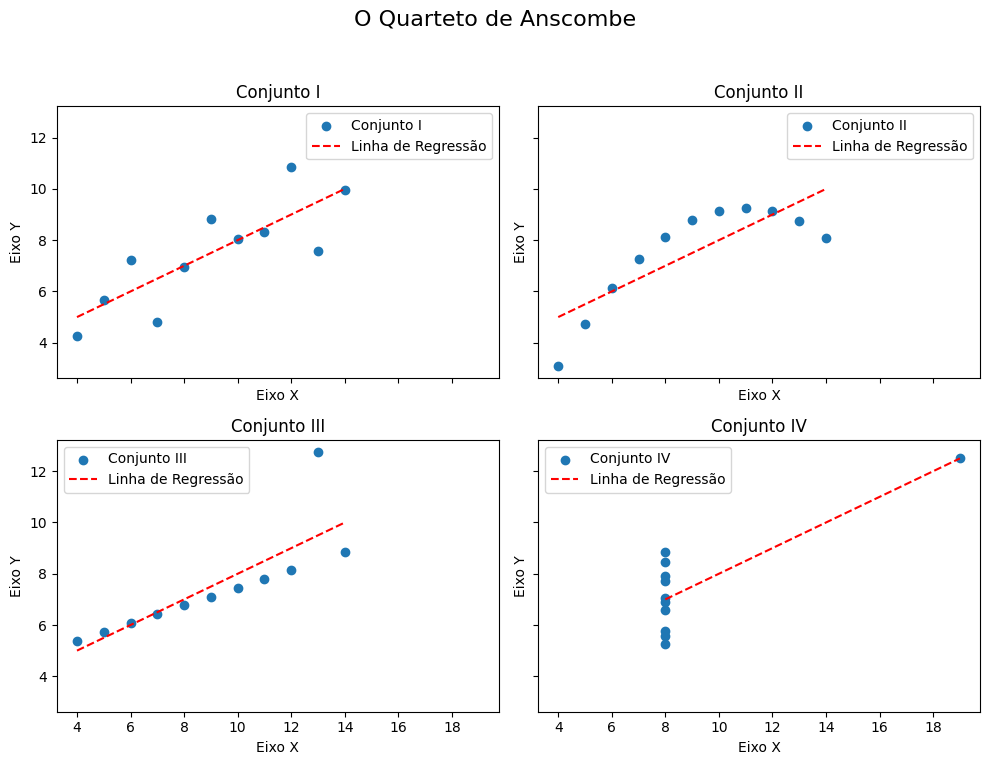


A lição é clara:
• O **Conjunto I** é o que esperamos de uma relação linear.
• O **Conjunto II** mostra uma relação claramente não-linear (curva), mesmo com a linha reta parecendo se encaixar.
• O **Conjunto III** tem uma relação linear perfeita, mas é totalmente distorcida por um único ponto fora do padrão (outlier).
• O **Conjunto IV** é quase uma linha vertical, mas um único ponto longe dos outros cria uma correlação falsa.

**Sempre visualize seus dados!** Gráficos mostram padrões, outliers e comportamentos que as estatísticas de resumo simplesmente não conseguem capturar.


In [1]:
# =================================================================
# 1. Configuração e Criação do Quarteto de Anscombe
# =================================================================

# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# As quatro séries de dados originais
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# Juntando os dados em um DataFrame para facilitar o manuseio
anscombe_quartet = {
    'I': {'x': x, 'y': y1},
    'II': {'x': x, 'y': y2},
    'III': {'x': x, 'y': y3},
    'IV': {'x': x4, 'y': y4}
}

# =================================================================
# 2. O Problema: Estatísticas de Resumo Quase Idênticas
# =================================================================

print("Passo 1: Calculando as estatísticas de resumo para cada conjunto de dados.")
print("-" * 50)

# Calculando e imprimindo as estatísticas para cada conjunto
for name, data in anscombe_quartet.items():
    df = pd.DataFrame(data)
    mean_x = df['x'].mean()
    mean_y = df['y'].mean()
    std_x = df['x'].std()
    std_y = df['y'].std()
    corr = df['x'].corr(df['y'])

    # Calculando a equação da linha de regressão
    slope, intercept, r_value, p_value, std_err = linregress(df['x'], df['y'])

    print(f"Conjunto {name}:")
    print(f"  Média de X:      {mean_x:.2f}")
    print(f"  Média de Y:      {mean_y:.2f}")
    print(f"  Desvio Padrão X: {std_x:.2f}")
    print(f"  Desvio Padrão Y: {std_y:.2f}")
    print(f"  Correlação XY:   {corr:.2f}")
    print(f"  Equação da Linha: y = {slope:.2f}x + {intercept:.2f}\n")

print("\nSurpresa! Todas as quatro séries de dados têm estatísticas de resumo quase idênticas.")
print("Pela lógica, elas deveriam ser muito parecidas, certo?")

# =================================================================
# 3. A Solução: Visualizar os Dados
# =================================================================

print("\nPasso 2: Visualizando os dados para ver o que realmente está acontecendo.")
print("-" * 50)

# Criando 4 subplots para visualizar cada conjunto de dados
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle('O Quarteto de Anscombe', fontsize=16)

# Iterando sobre os conjuntos de dados para plotar
for i, name in enumerate(anscombe_quartet):
    data = anscombe_quartet[name]
    x_data = data['x']
    y_data = data['y']

    ax = axs[i // 2, i % 2]

    # Plotando os pontos
    ax.scatter(x_data, y_data, label=f'Conjunto {name}')

    # Calculando a linha de regressão
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Desenhando a linha de regressão
    reg_line_x = np.array([np.min(x_data), np.max(x_data)])
    reg_line_y = slope * reg_line_x + intercept
    ax.plot(reg_line_x, reg_line_y, color='red', linestyle='--', label='Linha de Regressão')

    ax.set_title(f'Conjunto {name}')
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.legend()

# Ajustando o layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# =================================================================
# 4. A Lição do Quarteto
# =================================================================

print("\nA lição é clara:")
print("• O **Conjunto I** é o que esperamos de uma relação linear.")
print("• O **Conjunto II** mostra uma relação claramente não-linear (curva), mesmo com a linha reta parecendo se encaixar.")
print("• O **Conjunto III** tem uma relação linear perfeita, mas é totalmente distorcida por um único ponto fora do padrão (outlier).")
print("• O **Conjunto IV** é quase uma linha vertical, mas um único ponto longe dos outros cria uma correlação falsa.")

print("\n**Sempre visualize seus dados!** Gráficos mostram padrões, outliers e comportamentos que as estatísticas de resumo simplesmente não conseguem capturar.")